In [30]:
from cpymad.madx import Madx
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Tutorial 3


## First part

In [2]:
myMad = Madx()
myString='''
quadrupoleLength=5;
dipoleLength=15;
cellLength=100;
nBend=736;


myK=2.8/cellLength/quadrupoleLength;// m^-2

myAngle=2*pi/nBend;
QF: quadrupole, L=quadrupoleLength, K1=myK;
QD: quadrupole, L=quadrupoleLength, K1=-myK;
BM: sbend, L=dipoleLength, angle:=myAngle; 

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

beam, particle=proton, energy=7000;

use, sequence=myCell;
twiss, table=first_twiss;
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="First plot";
'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.06.07               +
  + Execution date: 2022.03.01 07:54:30      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0006051853679        40.64955451 

                q1                dq1            betxmax              dxmax 
       0.236500685      -0.2917600666        160.5475138        2.444933737 

             dxrms             xcomax             xcorms                 q2 
       1.953527658                  0                  0       0.2363728498 

               dq2            betymax              dymax 

In [3]:
first_df=myMad.table['first_twiss'].dframe()
first_summary=myMad.table['summ'].dframe()
first_df[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]



name     keyword      s    x    y   px   py        betx  \
#s          mycell$start:1      marker    0.0  0.0  0.0  0.0  0.0  160.547514   
q1                    q1:1  quadrupole    5.0  0.0  0.0  0.0  0.0  160.547514   
drift_0[0]       drift_0:0       drift   10.0  0.0  0.0  0.0  0.0  138.907441   
b1                    b1:1       sbend   25.0  0.0  0.0  0.0  0.0   85.384548   
drift_1[0]       drift_1:0       drift   30.0  0.0  0.0  0.0  0.0   71.343992   
b2                    b2:1       sbend   45.0  0.0  0.0  0.0  0.0   40.628665   
drift_2[0]       drift_2:0       drift   50.0  0.0  0.0  0.0  0.0   34.193082   
q2                    q2:1  quadrupole   55.0  0.0  0.0  0.0  0.0   34.193082   
drift_3[0]       drift_3:0       drift   60.0  0.0  0.0  0.0  0.0   40.628665   
b3                    b3:1       sbend   75.0  0.0  0.0  0.0  0.0   71.343992   
drift_4[0]       drift_4:0       drift   80.0  0.0  0.0  0.0  0.0   85.384548   
b4                    b4:1       sbend   95.0  0.0  0.0  0.0  0.0  138.907441   
drift_5[0]       drift_5:0       drift  100.0  0.0  0.0  0.0  0.0  160.547514   
#e            mycell$end:1      marker  100.0  0.0  0.0  0.0  0.0  160.547514   

                alfx       mux        bety      alfy       muy        dx   dy  \
#s         -2.259046  0.000000   34.217492  0.548735  0.000000  2.444934  0.0   
q1          2.259046  0.004843   34.217492 -0.548735  0.023892  2.444934  0.0   
drift_0[0]  2.068969  0.010172   40.655458 -0.738858  0.045293  2.271763  0.0   
b1          1.499138  0.032163   71.376768 -1.309229  0.090204  1.816202  0.0   
drift_1[0]  1.308974  0.042366   85.419675 -1.499352  0.100402  1.685667  0.0   
b2          0.738665  0.087302  138.955807 -2.069723  0.122384  1.358032  0.0   
drift_2[0]  0.548451  0.108717  160.603655 -2.259847  0.127712  1.270145  0.0   
q2         -0.548451  0.132626  160.603655  2.259847  0.132553  1.270145  0.0   
drift_3[0] -0.738665  0.154041  138.955807  2.069723  0.137881  1.358032  0.0   
b3         -1.308974  0.198978   85.419675  1.499352  0.159863  1.685667  0.0   
drift_4[0] -1.499138  0.209180   71.376768  1.309229  0.170062  1.816202  0.0   
b4         -2.068969  0.231171   40.655458  0.738858  0.214973  2.271763  0.0   
drift_5[0] -2.259046  0.236501   34.217492  0.548735  0.236373  2.444934  0.0   
#e         -2.259046  0.236501   34.217492  0.548735  0.236373  2.444934  0.0   

                 dpx  dpy  
#s          0.034634 -0.0  
q1         -0.034634  0.0  
drift_0[0] -0.034634  0.0  
b1         -0.026107  0.0  
drift_1[0] -0.026107  0.0  
b2         -0.017577  0.0  
drift_2[0] -0.017577  0.0  
q2          0.017577  0.0  
drift_3[0]  0.017577  0.0  
b3          0.026107  0.0  
drift_4[0]  0.026107  0.0  
b4          0.034634  0.0  
drift_5[0]  0.034634  0.0  
#e          0.034634  0.0

In [4]:
myString='''
myAngle=2*pi*0;
twiss, table=second_twiss;
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="Second plot";
'''
myMad.input(myString);

++++++ info: myangle redefined
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0                  0                  0 

                q1                dq1            betxmax              dxmax 
      0.2363728498      -0.2921003657        160.6036546                  0 

             dxrms             xcomax             xcorms                 q2 
                 0                  0                  0       0.2363728498 

               dq2            betymax              dymax              dyrms 
     -0.2921003657        160.6036546                 -0                  0 

            ycomax             ycorms             deltap            synch_1 
                 0                  0                  0                  0 


In [5]:
second_df=myMad.table['second_twiss'].dframe()
second_summary=myMad.table['summ'].dframe()

second_df[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

name     keyword      s    x    y   px   py        betx  \
#s          mycell$start:1      marker    0.0  0.0  0.0  0.0  0.0  160.603655   
q1                    q1:1  quadrupole    5.0  0.0  0.0  0.0  0.0  160.603655   
drift_0[0]       drift_0:0       drift   10.0  0.0  0.0  0.0  0.0  138.955807   
b1                    b1:1       sbend   25.0  0.0  0.0  0.0  0.0   85.419675   
drift_1[0]       drift_1:0       drift   30.0  0.0  0.0  0.0  0.0   71.376768   
b2                    b2:1       sbend   45.0  0.0  0.0  0.0  0.0   40.655458   
drift_2[0]       drift_2:0       drift   50.0  0.0  0.0  0.0  0.0   34.217492   
q2                    q2:1  quadrupole   55.0  0.0  0.0  0.0  0.0   34.217492   
drift_3[0]       drift_3:0       drift   60.0  0.0  0.0  0.0  0.0   40.655458   
b3                    b3:1       sbend   75.0  0.0  0.0  0.0  0.0   71.376768   
drift_4[0]       drift_4:0       drift   80.0  0.0  0.0  0.0  0.0   85.419675   
b4                    b4:1       sbend   95.0  0.0  0.0  0.0  0.0  138.955807   
drift_5[0]       drift_5:0       drift  100.0  0.0  0.0  0.0  0.0  160.603655   
#e            mycell$end:1      marker  100.0  0.0  0.0  0.0  0.0  160.603655   

                alfx       mux        bety      alfy       muy   dx   dy  dpx  \
#s         -2.259847  0.000000   34.217492  0.548735  0.000000  0.0 -0.0 -0.0   
q1          2.259847  0.004841   34.217492 -0.548735  0.023892  0.0  0.0  0.0   
drift_0[0]  2.069723  0.010169   40.655458 -0.738858  0.045293  0.0  0.0  0.0   
b1          1.499352  0.032151   71.376768 -1.309229  0.090204  0.0  0.0  0.0   
drift_1[0]  1.309229  0.042350   85.419675 -1.499352  0.100402  0.0  0.0  0.0   
b2          0.738858  0.087260  138.955807 -2.069723  0.122384  0.0  0.0  0.0   
drift_2[0]  0.548735  0.108661  160.603655 -2.259847  0.127712  0.0  0.0  0.0   
q2         -0.548735  0.132553  160.603655  2.259847  0.132553  0.0  0.0  0.0   
drift_3[0] -0.738858  0.153953  138.955807  2.069723  0.137881  0.0  0.0  0.0   
b3         -1.309229  0.198864   85.419675  1.499352  0.159863  0.0  0.0  0.0   
drift_4[0] -1.499352  0.209063   71.376768  1.309229  0.170062  0.0  0.0  0.0   
b4         -2.069723  0.231045   40.655458  0.738858  0.214973  0.0  0.0  0.0   
drift_5[0] -2.259847  0.236373   34.217492  0.548735  0.236373  0.0  0.0  0.0   
#e         -2.259847  0.236373   34.217492  0.548735  0.236373  0.0  0.0  0.0   

            dpy  
#s         -0.0  
q1          0.0  
drift_0[0]  0.0  
b1          0.0  
drift_1[0]  0.0  
b2          0.0  
drift_2[0]  0.0  
q2          0.0  
drift_3[0]  0.0  
b3          0.0  
drift_4[0]  0.0  
b4          0.0  
drift_5[0]  0.0  
#e          0.0

In [6]:
aux=pd.DataFrame({'With dipoles':first_df.max(),'Without dipoles':second_df.max()})
aux.loc[['betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
        ]]

With dipoles Without dipoles
betx      160.548         160.604
alfx      2.25905         2.25985
mux      0.236501        0.236373
bety      160.604         160.604
alfy      2.25985         2.25985
muy      0.236373        0.236373
dx        2.44493               0
dy              0              -0
dpx     0.0346341              -0
dpy            -0              -0

In [7]:
# There are
Ncells=736/4 
Ncells
#FODO cells

184.0

In [8]:
#The machine tunes are therefore
display(Ncells*first_df['mux'].max())
display(Ncells*first_df['muy'].max())

43.516126037479175

43.49260436271754

## Second part

In [9]:
myMad = Madx()
myString='''
quadrupoleLength=5;
dipoleLength=15;
cellLength=100;
nBend=736;


myK=2.8/cellLength/quadrupoleLength;// m^-2

myAngle=2*pi/nBend;
QF: quadrupole, L=quadrupoleLength, K1=myK;
QD: quadrupole, L=quadrupoleLength, K1=-myK;
BM: sbend, L=dipoleLength, angle:=myAngle; 

myCell:sequence, refer=entry, L=cellLength;
q1: QF, at=0;
B1: BM, at =5+quadrupoleLength/2, from=q1;
B2: BM, at =5+dipoleLength/2, from=B1;
q2: QD, at=cellLength/2;
B3: BM, at =5+quadrupoleLength/2, from=q2;
B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

beam, particle=proton, energy=1;!here I am bit  extreme to see an effect on chromaticity

use, sequence=myCell;
twiss;
'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.06.07               +
  + Execution date: 2022.03.01 07:54:33      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0006051853679        40.64955451 

                q1                dq1            betxmax              dxmax 
       0.236500685      -0.8434855722        160.5475138        7.068363936 

             dxrms             xcomax             xcorms                 q2 
       5.647696801                  0                  0       0.2363728498 

               dq2            betymax              dymax 

In [10]:
third_df=myMad.table['twiss'].dframe()
third_summary=myMad.table['summ'].dframe()
third_df[['name', 'keyword', 's', 
          'x','y','px','py',
          'betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
          ]]

name     keyword      s    x    y   px   py        betx  \
#s          mycell$start:1      marker    0.0  0.0  0.0  0.0  0.0  160.547514   
q1                    q1:1  quadrupole    5.0  0.0  0.0  0.0  0.0  160.547514   
drift_0[0]       drift_0:0       drift   10.0  0.0  0.0  0.0  0.0  138.907441   
b1                    b1:1       sbend   25.0  0.0  0.0  0.0  0.0   85.384548   
drift_1[0]       drift_1:0       drift   30.0  0.0  0.0  0.0  0.0   71.343992   
b2                    b2:1       sbend   45.0  0.0  0.0  0.0  0.0   40.628665   
drift_2[0]       drift_2:0       drift   50.0  0.0  0.0  0.0  0.0   34.193082   
q2                    q2:1  quadrupole   55.0  0.0  0.0  0.0  0.0   34.193082   
drift_3[0]       drift_3:0       drift   60.0  0.0  0.0  0.0  0.0   40.628665   
b3                    b3:1       sbend   75.0  0.0  0.0  0.0  0.0   71.343992   
drift_4[0]       drift_4:0       drift   80.0  0.0  0.0  0.0  0.0   85.384548   
b4                    b4:1       sbend   95.0  0.0  0.0  0.0  0.0  138.907441   
drift_5[0]       drift_5:0       drift  100.0  0.0  0.0  0.0  0.0  160.547514   
#e            mycell$end:1      marker  100.0  0.0  0.0  0.0  0.0  160.547514   

                alfx       mux        bety      alfy       muy        dx   dy  \
#s         -2.259046  0.000000   34.217492  0.548735  0.000000  7.068364  0.0   
q1          2.259046  0.004843   34.217492 -0.548735  0.023892  7.068364  0.0   
drift_0[0]  2.068969  0.010172   40.655458 -0.738858  0.045293  6.567724  0.0   
b1          1.499138  0.032163   71.376768 -1.309229  0.090204  5.250686  0.0   
drift_1[0]  1.308974  0.042366   85.419675 -1.499352  0.100402  4.873305  0.0   
b2          0.738665  0.087302  138.955807 -2.069723  0.122384  3.926103  0.0   
drift_2[0]  0.548451  0.108717  160.603655 -2.259847  0.127712  3.672019  0.0   
q2         -0.548451  0.132626  160.603655  2.259847  0.132553  3.672019  0.0   
drift_3[0] -0.738665  0.154041  138.955807  2.069723  0.137881  3.926103  0.0   
b3         -1.308974  0.198978   85.419675  1.499352  0.159863  4.873305  0.0   
drift_4[0] -1.499138  0.209180   71.376768  1.309229  0.170062  5.250686  0.0   
b4         -2.068969  0.231171   40.655458  0.738858  0.214973  6.567724  0.0   
drift_5[0] -2.259046  0.236501   34.217492  0.548735  0.236373  7.068364  0.0   
#e         -2.259046  0.236501   34.217492  0.548735  0.236373  7.068364  0.0   

                 dpx  dpy  
#s          0.100128 -0.0  
q1         -0.100128  0.0  
drift_0[0] -0.100128  0.0  
b1         -0.075476  0.0  
drift_1[0] -0.075476  0.0  
b2         -0.050817  0.0  
drift_2[0] -0.050817  0.0  
q2          0.050817  0.0  
drift_3[0]  0.050817  0.0  
b3          0.075476  0.0  
drift_4[0]  0.075476  0.0  
b4          0.100128  0.0  
drift_5[0]  0.100128  0.0  
#e          0.100128  0.0

In [11]:
# Machine tunes at 7000 GeV
display(Ncells*first_df['mux'].max())
display(Ncells*first_df['muy'].max())

43.516126037479175

43.49260436271754

In [12]:
# Machine tunes at 1 GeV
display(Ncells*third_df['mux'].max())
display(Ncells*third_df['muy'].max())

43.51612603747918

43.49260436271754

In [13]:
aux=pd.DataFrame({'With dipoles 7 TeV':first_df.max(),'Without dipoles 7 TeV':second_df.max(),'With dipoles 1 TeV':third_df.max()})
aux.loc[['betx', 'alfx', 'mux', 
          'bety', 'alfy', 'muy',
          'dx','dy','dpx','dpy',
        ]]

With dipoles 7 TeV Without dipoles 7 TeV With dipoles 1 TeV
betx            160.548               160.604            160.548
alfx            2.25905               2.25985            2.25905
mux            0.236501              0.236373           0.236501
bety            160.604               160.604            160.604
alfy            2.25985               2.25985            2.25985
muy            0.236373              0.236373           0.236373
dx              2.44493                     0            7.06836
dy                    0                    -0                  0
dpx           0.0346341                    -0           0.100128
dpy                  -0                    -0                 -0

**Conclusion**: since the K1 is normalized to the beam rigidity, the beam rigidity has not impact on the beta fuctions and on the phase advance (watch out the definition of the DQ1 and all the momentum derivative quantities in MADX...).

In [17]:
# Machine dispersion at 7000 GeV
dx_7000=first_df['dx'].max()
display(dx_7000)

2.444933737334302

In [18]:
# Machine dispersion at 1 GeV
dx_1=third_df['dx'].max()
display(dx_1)

7.068363935508398

In [20]:
# Dispersion in MADX has to be divided by the relativistic beta:
import numpy as np
beta_1=np.sqrt(1-(1/myMad.globals['pmass'])**(-2))
beta_7000=np.sqrt(1-(7000/myMad.globals['pmass'])**(-2))

#dx_7000*beta_7000=dx_1*beta_1
dx_7000_bis=dx_1*beta_1/beta_7000
display(dx_1, dx_7000, dx_7000_bis)
# Dispersion does not change with beam energy
# whatch out the importance of beta for the Dispersion!

7.068363935508398

2.444933737334302

2.4449337373338333

In [21]:
# Machine chromaticity at 7000 GeV
display(first_summary.iloc[0][['dq1','dq2']])

dq1   -0.291760
dq2   -0.291857
Name: #e, dtype: float64

In [22]:
# Machine chromaticity at 1 GeV
display(third_summary.iloc[0][['dq1','dq2']])

dq1   -0.843486
dq2   -0.843765
Name: #e, dtype: float64

In [23]:
# whatch out the importance of beta for the chromaticity!
display(third_summary.iloc[0][['dq1','dq2']]*beta_1/beta_7000)

dq1   -0.291760
dq2   -0.291857
Name: #e, dtype: float64

### Tunes and phase
Concerning the phase advance per cell to reach the (60.2, 67.2) tunes we have

In [27]:
import numpy as np
np.array([60.2, 67.2])/Ncells
Qx=60.2
Qy=67.2
phase_advance_cell_x=Qx/Ncells
phase_advance_cell_y=Qy/Ncells
print("New phase advance per cell x,y = ", phase_advance_cell_x, phase_advance_cell_y)
print("Old phase advance per cell x,y = ", first_summary.iloc[0][['q1','q2']])

New phase advance per cell x,y =  0.32717391304347826 0.3652173913043478
Old phase advance per cell x,y =  q1    0.236501
q2    0.236373
Name: #e, dtype: float64


In [28]:
myMad = Madx()
myString='''
quadrupoleLength=5;
dipoleLength=15;
cellLength=100;
nBend=736;
phaseWantedX=60.2/(nBend/4);
phaseWantedY=67.2/(nBend/4);


myKF=2.8/cellLength/quadrupoleLength;// m^-2
myKD=-myKF;


QF: quadrupole, L=quadrupoleLength, K1:=myKF;
QD: quadrupole, L=quadrupoleLength, K1:=myKD;
BM: sbend, L=dipoleLength, angle=2*pi/nBend; 

myCell:sequence, refer=entry, L=cellLength;
 q1: QF, at=0;
 B1: BM, at =5+quadrupoleLength/2, from=q1;
 B2: BM, at =5+dipoleLength/2, from=B1;
 q2: QD, at=cellLength/2;
 B3: BM, at =5+quadrupoleLength/2, from=q2;
 B4: BM, at =5+dipoleLength/2, from=B3;
endsequence;

beam, particle=proton, energy=7000;

use, sequence=myCell;
twiss, file="BeforeMatching.txt";
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="BeforeMatching";


MATCH, SEQUENCE=myCell;
GLOBAL, Q1=phaseWantedX;//H-tune
GLOBAL, Q2=phaseWantedY;//V-tune
VARY, NAME= myKF, STEP=0.00001;
VARY, NAME= myKD, STEP=0.00001;
LMDIF, CALLS=50, TOLERANCE=1e-6;//method adopted
ENDMATCH;

twiss, file="AfterMatching.txt";
!plot, haxis=s, vaxis=betx,bety,dx,colour=100, title="AfterMatching";

value, table(summ,Q1)*(nBend/4);
value, table(summ,Q2)*(nBend/4);

'''
myMad.input(myString);


  ++++++++++++++++++++++++++++++++++++++++++++
  +     MAD-X 5.05.01  (64 bit, Linux)       +
  + Support: mad@cern.ch, http://cern.ch/mad +
  + Release   date: 2019.06.07               +
  + Execution date: 2022.03.01 08:02:54      +
  ++++++++++++++++++++++++++++++++++++++++++++
enter Twiss module
  
iteration:   1 error:   0.000000E+00 deltap:   0.000000E+00
orbit:   0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00  0.000000E+00

++++++ table: summ

            length             orbit5               alfa            gammatr 
               100                 -0    0.0006051853679        40.64955451 

                q1                dq1            betxmax              dxmax 
       0.236500685      -0.2917600666        160.5475138        2.444933737 

             dxrms             xcomax             xcorms                 q2 
       1.953527658                  0                  0       0.2363728498 

               dq2            betymax              dymax 

KFLL =  3.562385  which corresponds to a betax in the plot below > 200 m


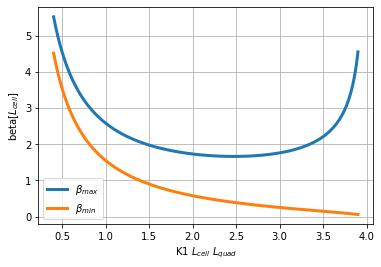

In [35]:
KLL=np.linspace(.4,3.9,1000)
mu=2*np.arcsin(KLL/4)
plt.plot(KLL,(1+np.sin(mu/2))/np.sin(mu),label='$\\beta_{max}$', lw=3)
plt.plot(KLL,(1-np.sin(mu/2))/np.sin(mu),label='$\\beta_{min}$', lw=3)
plt.legend(loc='best')
plt.grid(True)
plt.grid()
plt.grid()
plt.ylabel('beta[$L_{cell}$]');
plt.xlabel('K1 $L_{cell}$ $L_{quad}$');

# The new kf = 7.12477e-03, kd = -7.52902e-03
kf = 7.12477e-03
kd= -7.52902e-03
quadrupoleLength=5;
cellLength=100;

KfLL=kf*cellLength*quadrupoleLength
print("KFLL = ", KfLL, " which corresponds to a betax in the plot below betax > 200 m")

As we increase the normalized strenght of the quadrupoles, the tune, and therefore the phase advance per cell, increases (see plot below), however, the beta function has two behaviours (see plot above): up to a value of KLcellLquad = 2.5, as the phase advance increases, the beta function decreases aas intuitivelly can be seen from equation below:
\begin{equation}
\mu=\int\frac{1}{\beta(s)}ds
\end{equation}
But fr

The maximum tune for such a lattice (thin lens approximation) is 

In [ ]:
Ncells*.5

where we use the maximum phase advance per cell of:
phase_advance in MADX is in units of 2$\pi$
\begin{equation}
\Psi_{cell} (units: 2\pi)= 0.5 \cdot 2\pi=\pi
\end{equation}
0.5 (asymptotic value, that is 180 deg) in thin lens approximation.

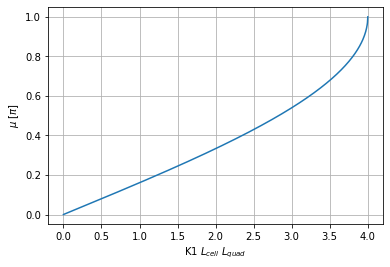

In [36]:
# If we use the plot:
KLL=np.linspace(0,4,1000)
mu=2*np.arcsin(KLL/4)
plt.plot(KLL,mu/np.pi)
plt.grid()
plt.ylabel('$\mu$ [$\pi$]');
plt.xlabel('K1 $L_{cell}$ $L_{quad}$');

The phase advance is in units of $\pi$, so the phase advance is 1 (in this plot)